In [1]:
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.neural_network import MLPClassifier

# 以线性不可分数据进行测试

In [2]:
def creat_data_no_linear_2d(n):
        '''
        创建二维的线性不可分数据集

        :param n: 负例的数量
        :return: 线性不可分数据集，数据集大小为 2*n+n/10 （ n/10 是误差点的数量，误差点导致了线性不可分）
        '''
        np.random.seed(1)
        x_11=np.random.randint(0,100,(n,1)) #  第一组：第一维坐标值
        x_12=10+np.random.randint(-5,5,(n,1,))#  第一组：第二维坐标值
        x_21=np.random.randint(0,100,(n,1))#  第二组：第一维坐标值
        x_22=20+np.random.randint(0,10,(n,1))#  第二组：第二维坐标值

        x_31=np.random.randint(0,100,(int(n/10),1))#  第三组：第一维坐标值
        x_32=20+np.random.randint(0,10,(int(n/10),1))#  第三组：第二维坐标值

        new_x_11=x_11*np.sqrt(2)/2-x_12*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_12=x_11*np.sqrt(2)/2+x_12*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_21=x_21*np.sqrt(2)/2-x_22*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_22=x_21*np.sqrt(2)/2+x_22*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_31=x_31*np.sqrt(2)/2-x_32*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_32=x_31*np.sqrt(2)/2+x_32*np.sqrt(2)/2## 沿第一维轴旋转45度

        plus_samples=np.hstack([new_x_11,new_x_12,np.ones((n,1))]) # 拼接成正例数据集
        minus_samples=np.hstack([new_x_21,new_x_22,-np.ones((n,1))])# 拼接成负例数据集
        err_samples=np.hstack([new_x_31,new_x_32,np.ones((int(n/10),1))])# 拼接成正例数据集，它导致了线性不可分
        samples=np.vstack([plus_samples,minus_samples,err_samples]) # 拼接成数据集
        np.random.shuffle(samples)  # 混洗数据
        return samples

In [3]:
def plot_samples_2d(ax,samples):
            '''
            绘制二维数据集

            :param ax: Axes 实例，用于绘制图形
            :param samples: 二维数据集
            :return: None
            '''
            Y=samples[:,-1]
            position_p=Y==1 ## 正类位置
            position_m=Y==-1 ## 负类位置
            ax.scatter(samples[position_p,0],samples[position_p,1],
                marker='+',label='+',color='b')
            ax.scatter(samples[position_m,0],samples[position_m,1],
                marker='^',label='-',color='y')

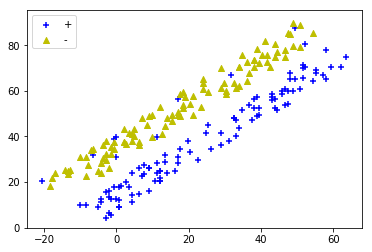

In [5]:
def run_plot_samples_2d():
    '''
    绘制二维线性不可分数据集

    :return: None
    '''
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    data=creat_data_no_linear_2d(100) # 生成二维线性不可分数据集
    plot_samples_2d(ax,data)
    ax.legend(loc='best')
    plt.show()

run_plot_samples_2d()

In [6]:
def predict_with_MLPClassifier(ax,train_data):
        '''
        使用 MLPClassifier绘制预测结果

        :param ax: Axes 实例，用于绘制图形
        :param train_data: 训练数据集
        :return: None
        '''
        train_x=train_data[:,:-1]
        train_y=train_data[:,-1]
        clf=MLPClassifier(activation='logistic',max_iter=1000)# 构造分类器实例
        clf.fit(train_x,train_y) # 训练分类器
        print(clf.score(train_x,train_y)) # 查看在训练集上的评价预测精度

        ## 用训练好的训练集预测平面上每一点的输出##
        x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
        y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
        plot_step=1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

0.9523809523809523


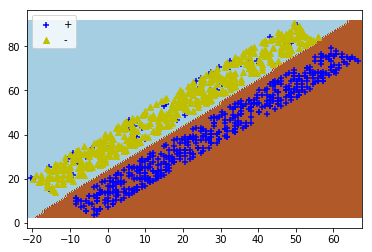

In [7]:
def run_predict_with_MLPClassifier():
    '''
    用 MLPClassifier 预测线性不可分数据集

    :return: None
    '''
    data=creat_data_no_linear_2d(500) #生成线性不可分数据集
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    predict_with_MLPClassifier(ax,data)
    plot_samples_2d(ax,data)
    ax.legend(loc='best')
    plt.show()

run_predict_with_MLPClassifier()